# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [55]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [14]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
- We see that there are 1898 rows and 9 columns in the data.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [15]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 
- There are columns of different types in the data.
- restaurant_name, cuisine_type, day_of_the_week, and rating are object type.
- cost_of_the order is a float
- The rest of the columns are int type.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [16]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There is no missing value.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [17]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: food_preparation_time:
- max = 35 minutes
- min = 20 minutes
- mean or average  = 27.37 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [18]:
# Write the code here
df["rating"].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: rating:
- There are 736 orders that are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [19]:
# Write the code here
# Order ID
df['order_id'].nunique()

1898

Customer ID

In [20]:
df['customer_id'].nunique()

1200

Restaurant Name

In [21]:
df['restaurant_name'].nunique()

178

Cuisine Type

In [22]:
df['cuisine_type'].nunique()

14

<AxesSubplot:xlabel='cuisine_type', ylabel='count'>

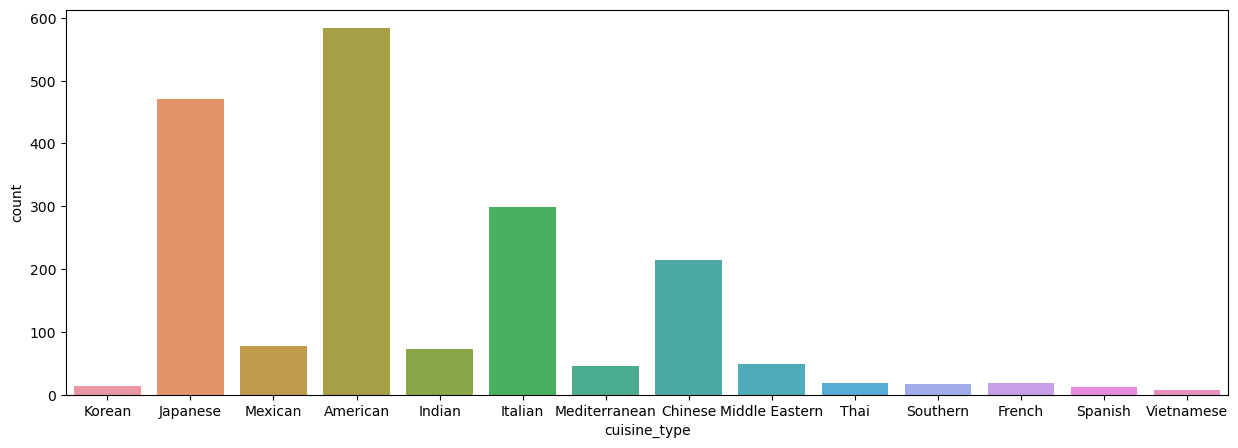

In [23]:
plt.figure(figsize =(15,5))
sns.countplot(data=df, x='cuisine_type')

In [251]:
amcount = df[df['cuisine_type']== "American"].shape[0]
amcount

584

In [253]:
jpcount = df[df['cuisine_type']== "Japanese"].shape[0]
jpcount

470

In [254]:
amjpcount = amcount + jpcount
amjpcount

1054

Cost of the order

In [24]:
df['cost_of_the_order'].nunique()

312

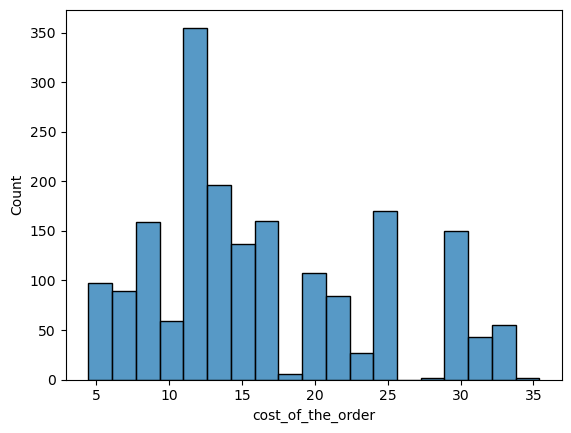

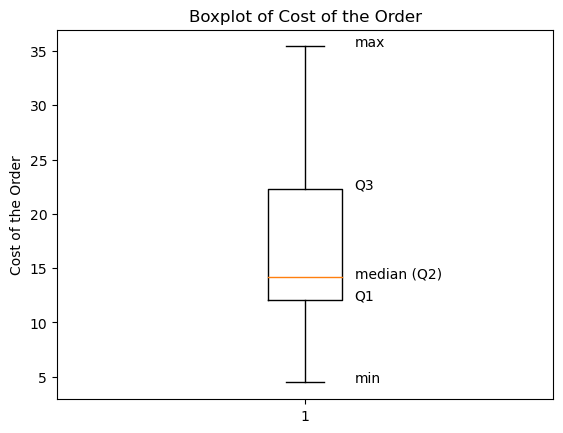

In [25]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
plt.boxplot(df['cost_of_the_order'])
plt.text(x = 1.1, y = df['cost_of_the_order'].min(), s ='min')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['cost_of_the_order'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.cost_of_the_order.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['cost_of_the_order'].max(), s ='max')
plt.title('Boxplot of Cost of the Order')
plt.ylabel('Cost of the Order')
plt.show()

<AxesSubplot:xlabel='day_of_the_week', ylabel='count'>

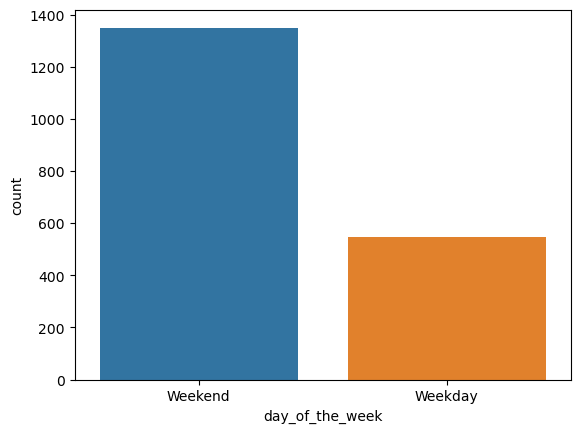

In [26]:
# day of the week
df['day_of_the_week'].unique()
sns.countplot(data=df, x='day_of_the_week')

Rating

In [27]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

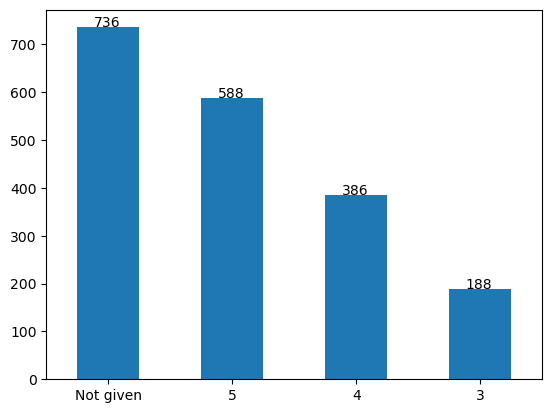

In [28]:
df.rating.value_counts().plot(kind='bar', rot = 0)
plt.text(x = -0.12, y = df.rating.value_counts()[0]+1, s = df.rating.value_counts()[0])
plt.text(x = 0.88, y = df.rating.value_counts()[1]+1, s = df.rating.value_counts()[1])
plt.text(x = 1.88, y = df.rating.value_counts()[2]+1, s = df.rating.value_counts()[2])
plt.text(x = 2.88, y = df.rating.value_counts()[3]+1, s = df.rating.value_counts()[3])
plt.show()

Food Preparation Time

In [29]:
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26],
      dtype=int64)

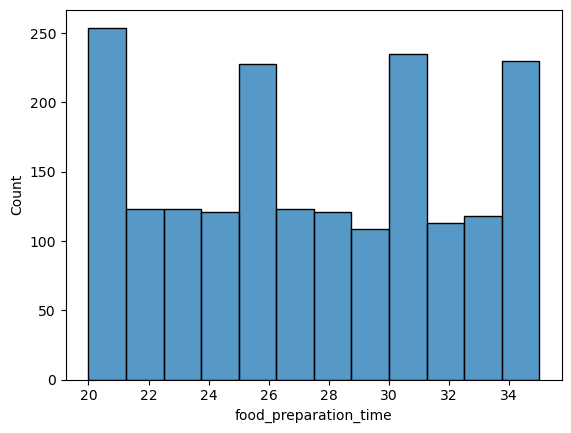

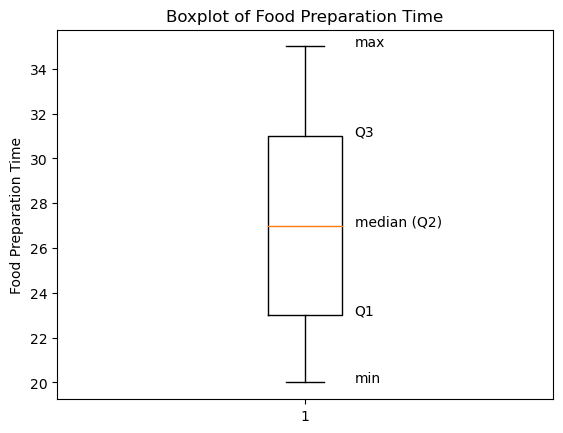

In [30]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
plt.boxplot(df['food_preparation_time'])
plt.text(x = 1.1, y = df['food_preparation_time'].min(), s ='min')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['food_preparation_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.food_preparation_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['food_preparation_time'].max(), s ='max')
plt.title('Boxplot of Food Preparation Time')
plt.ylabel('Food Preparation Time')
plt.show()

In [31]:
df.food_preparation_time.describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

Delivery Time

In [32]:
df.delivery_time.unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33], dtype=int64)

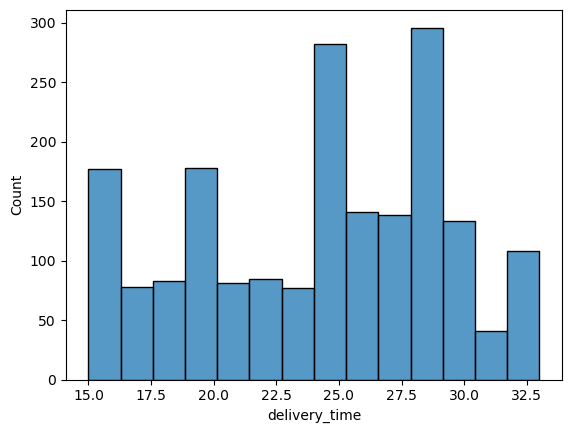

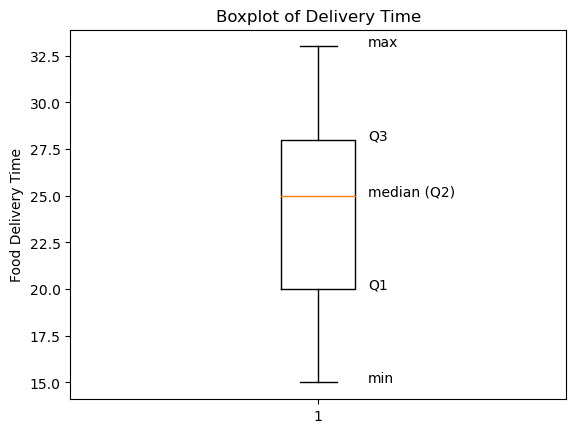

In [33]:
sns.histplot(data=df,x='delivery_time')
plt.show()
plt.boxplot(df['delivery_time'])
plt.text(x = 1.1, y = df['delivery_time'].min(), s ='min')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.25), s ='Q1')
plt.text(x = 1.1, y = df['delivery_time'].median(), s ='median (Q2)')
plt.text(x = 1.1, y = df.delivery_time.quantile(0.75), s ='Q3')
plt.text(x = 1.1, y = df['delivery_time'].max(), s ='max')
plt.title('Boxplot of Delivery Time')
plt.ylabel('Food Delivery Time')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
# Write the code here
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top five restaurants with the highest number of orders are: 
- Shake Shack
- The Meatball Shop
- Blue Ribbon Sushi
- Blue Ribbon Fried Chicken
- Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
# Write the code 
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
- American    
- Japanese    
- Italian    
- Chinese    
- Mexican     

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
# Write the code here
orders_20plus = df[df['cost_of_the_order'] > 20 ]
orders_20plus.shape

(555, 9)

In [37]:
df.shape[0]

1898

In [38]:
p20plus = ((orders_20plus.shape[0]/df.shape[0])*100)
print ('The perecentage of the orders cost more than 20 dollars is %.2f%%'%p20plus)

The perecentage of the orders cost more than 20 dollars is 29.24%


#### Observations:
The perecentage of the orders cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [39]:
# Write the code here
df.delivery_time.describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

In [40]:
df['delivery_time'].mean()

24.161749209694417

#### Observations: The mean order delivery time is 24.161749 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [41]:
# Write the code here
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Customer ID # : 52832, 47440, 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


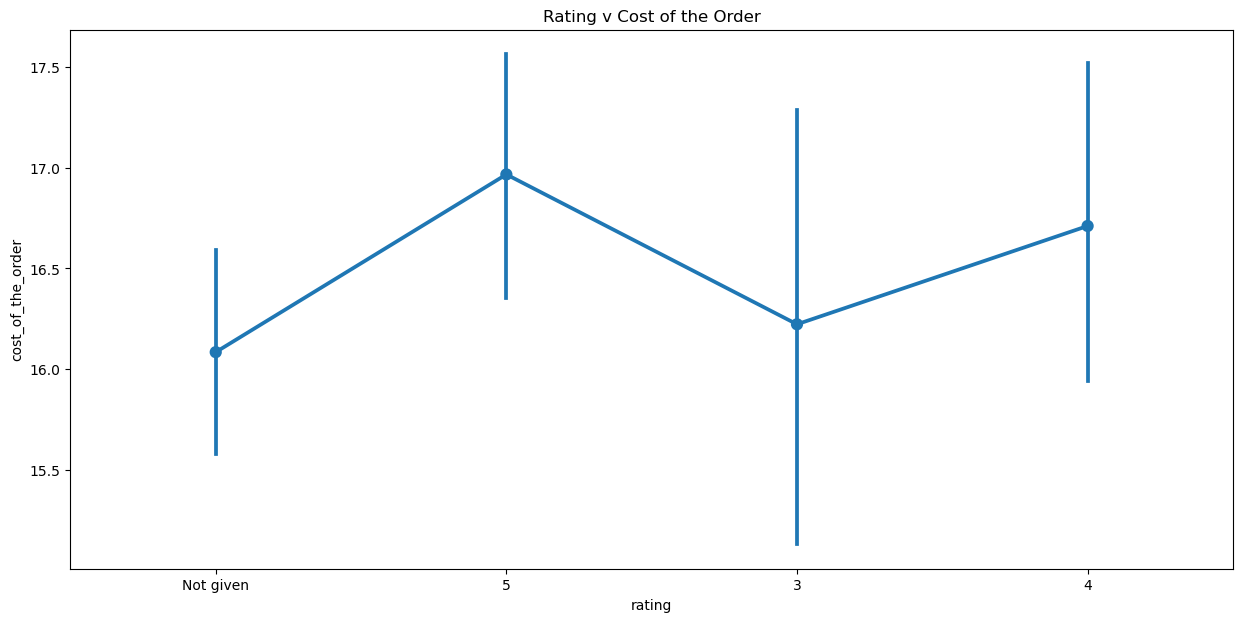

In [211]:
# Write the code here

# Cost of the order and rating
plt.figure(figsize=(15, 7))
sns.pointplot(data=df , x = 'rating', y = 'cost_of_the_order')  
plt.title('Rating v Cost of the Order')
plt.show()



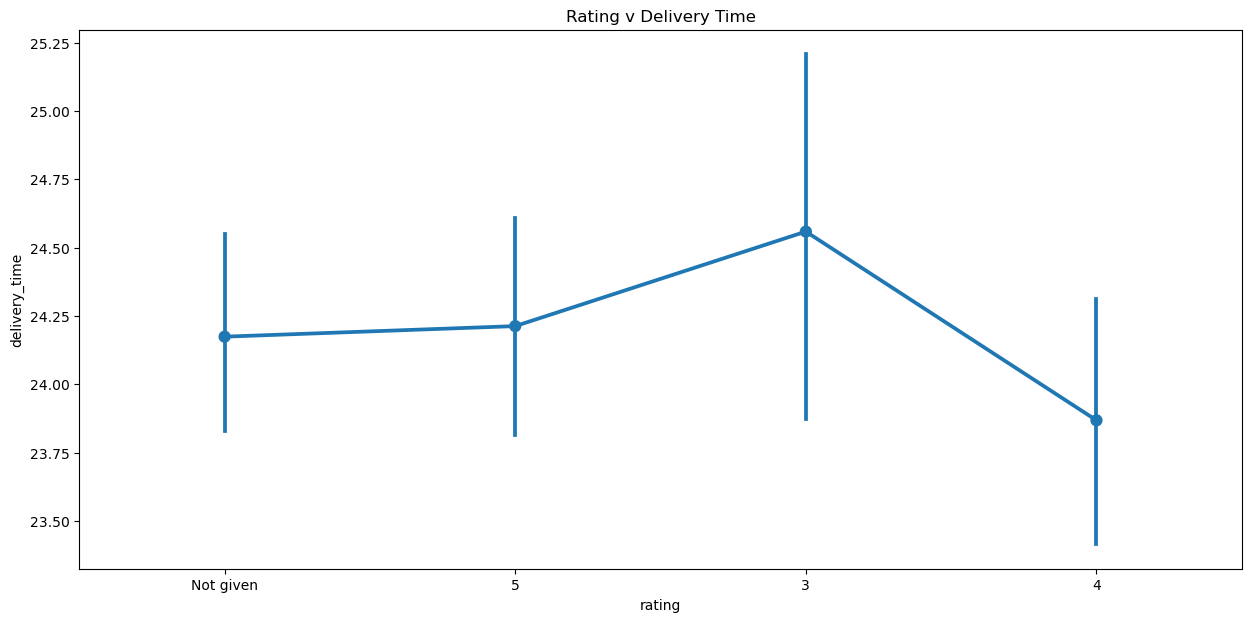

In [208]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.title('Rating v Delivery Time')
plt.show()
#rating v Delivery time

Cuisine and Total bill

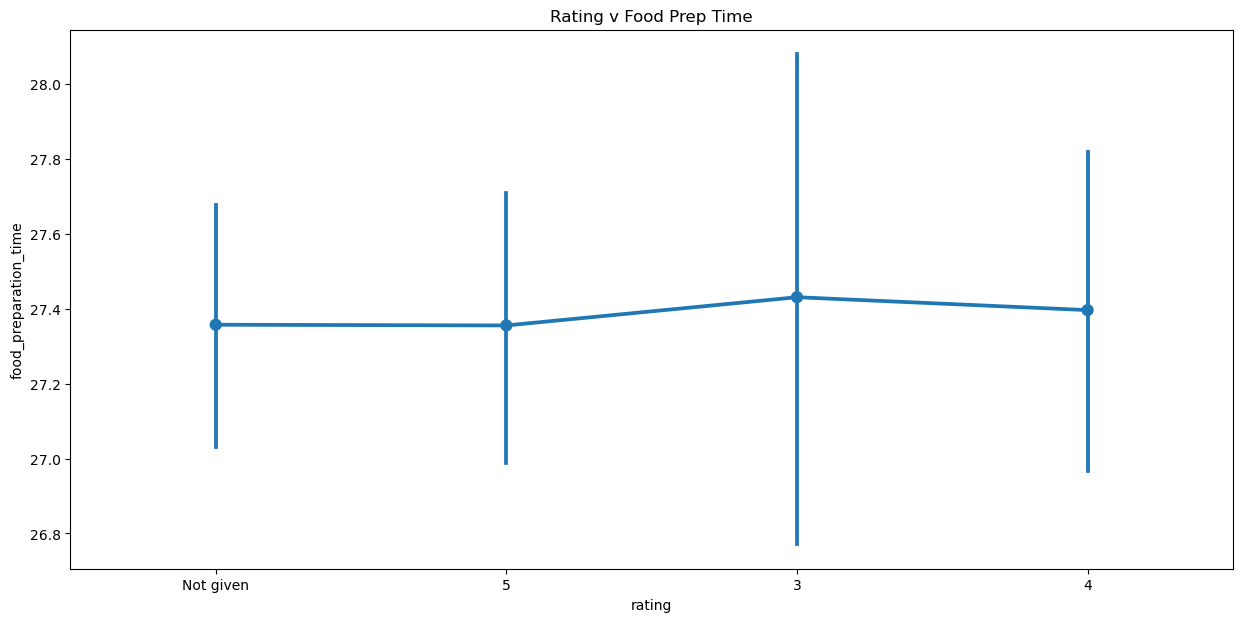

In [207]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x= 'rating', y='food_preparation_time')
plt.title('Rating v Food Prep Time')
plt.show()

<Figure size 1500x1500 with 0 Axes>

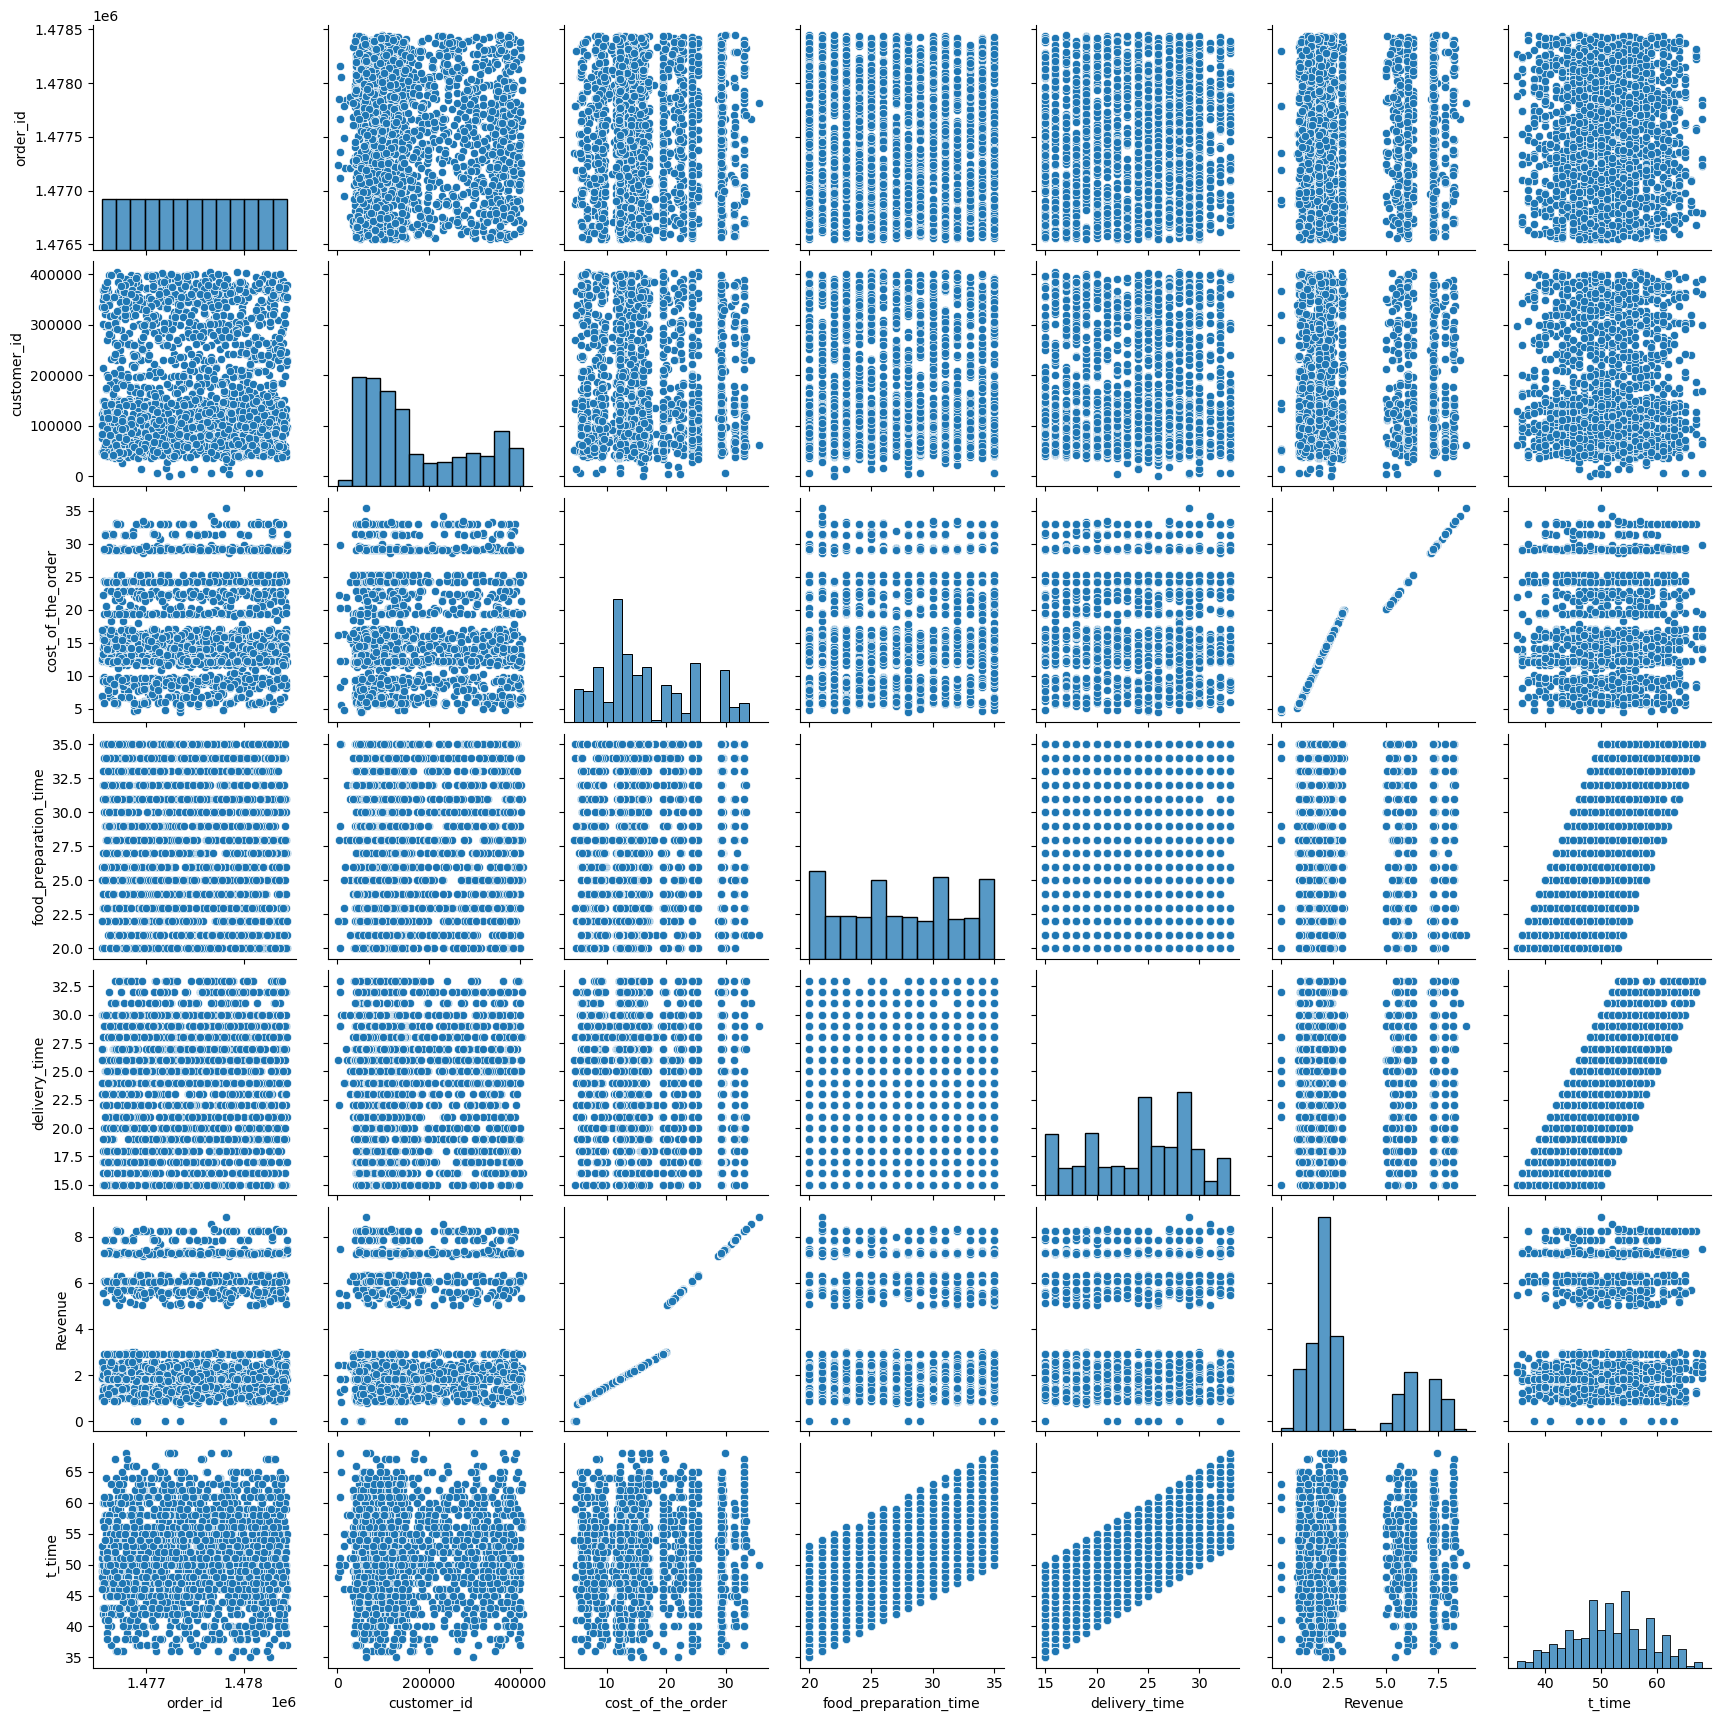

In [198]:
plt.figure(figsize = (15,15))
sns.pairplot(df)
plt.show()

<AxesSubplot:>

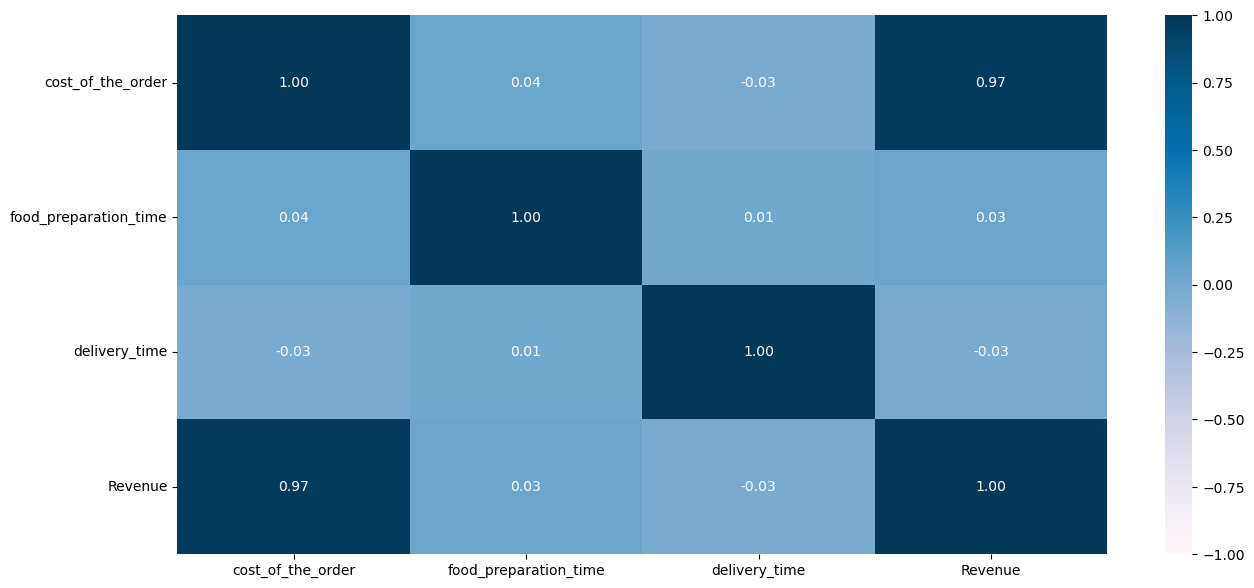

In [213]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'Revenue']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PuBu")

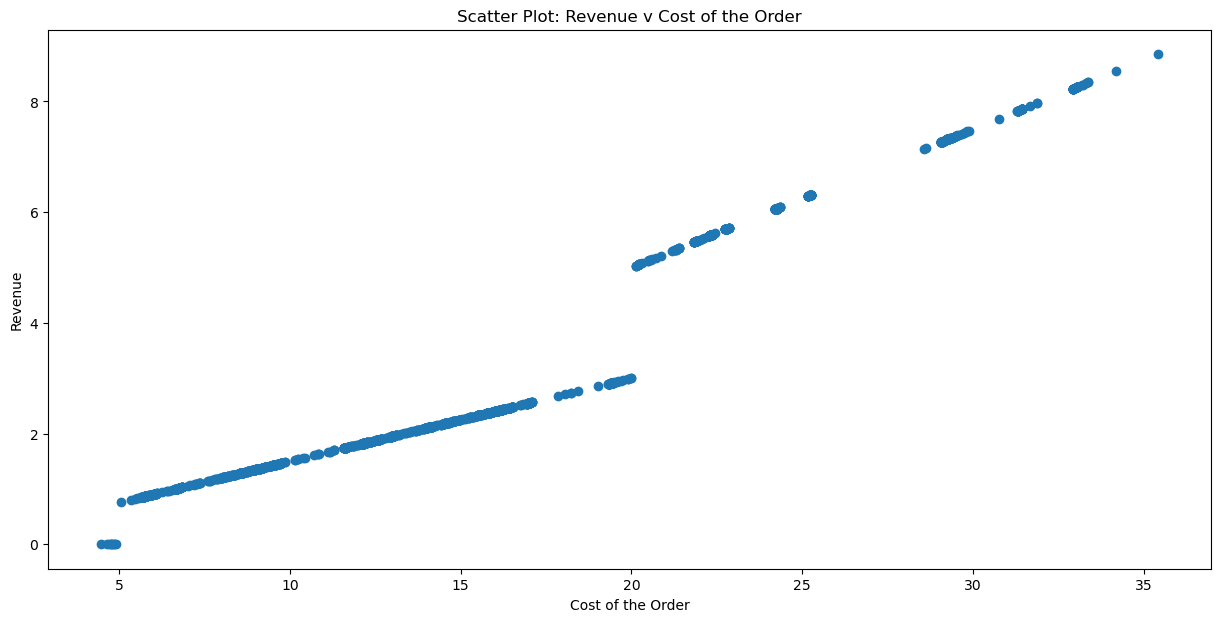

In [206]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
plt.scatter(data=df, x= 'cost_of_the_order', y='Revenue')
plt.title('Scatter Plot: Revenue v Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Revenue')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [229]:
# Write the code here
df_ratings = df[df['rating'] != 'Not given'].copy()
df_ratings['rating'] = df_ratings['rating'].astype('int')

dr_r = df_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
dr_r.head() 


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [230]:
rest_names = dr_r[dr_r['rating'] > 50]['restaurant_name'] 
rest_names

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [231]:
df_mean_4 = df_ratings[df_ratings['restaurant_name'].isin(rest_names)].copy()
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
The top four restaurants with 50 ratings or more of a 4 or higher are: The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [153]:
#profit from orders having orders greater than 5
df_cost5 = df[df['cost_of_the_order'] > 5].copy()
df_cost5 = df_cost5[df_cost5['cost_of_the_order'] <= 20]
profit5 = (df_cost5['cost_of_the_order'].sum())*.15
profit5

2477.5755000000004

In [154]:
#profit from orders having orders greater than 20
df_cost20 = df[df['cost_of_the_order'] > 20].copy()
profit20 = (df_cost20['cost_of_the_order'].sum())*.25
profit20

3688.7275

In [161]:
profit_T = profit5 + profit20
print ('The net profit the company observe from orders is around $%.2f'%profit_T)

The net profit the company observe from orders is around $6166.30


#### Observations: The net profit the company observe from orders is around $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [165]:
# Write the code here
df['t_time'] = df['food_preparation_time'] + df['delivery_time']
df['t_time'] = 

0       45
1       48
2       51
3       40
4       49
        ..
1893    48
1894    50
1895    55
1896    54
1897    52
Name: t_time, Length: 1898, dtype: int64

In [180]:
orders60 = df[df['t_time'] > 60]
p_orders60 = (orders60.shape[0]/df.shape[0])*100
print ('The perecentage of the orders that take more than 60 minutes is %.2f%%'%p_orders60)

The perecentage of the orders that take more than 60 minutes is 10.54%


#### Observations: The perecentage of the orders that take more than 60 minutes is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [193]:
df.groupby(['day_of_the_week'])['delivery_time'].mean().sort_values(ascending = False).reset_index().dropna()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


The average mean for delivery time during the weekday average about 28.34 minutes and on 22.47 minutes on weekend

#### Observations:The average mean for delivery time during the weekday average about 28.34 minutes and on 22.47 minutes on weekend


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [212]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,Revenue,t_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,3.248842,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,2.295598,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,0.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,1.812000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,2.121000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.574375,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,8.852500,68.000000


In [316]:
df.groupby('cost_of_the_order')['cuisine_type'].sum().to_frame().sort_values(ascending = False, by='cost_of_the_order').head(15)

,cuisine_type
cost_of_the_order,
35.41,Mediterranean
34.19,Chinese
33.37,JapaneseJapanese
33.32,Mexican
33.22,Japanese
33.18,American
33.03,JapaneseJapaneseAmericanChineseAmericanIndianA...
32.98,AmericanJapaneseItalianItalianAmericanChineseJ...
32.93,AmericanChineseChineseAmericanJapaneseJapanese...


In [266]:
df.groupby('cost_of_the_order')['restaurant_name'].sum().to_frame().sort_values(ascending = False, by='cost_of_the_order').head(10)

,restaurant_name
cost_of_the_order,
35.41,Pylos
34.19,Han Dynasty
33.37,Blue Ribbon SushiNobu Next Door
33.32,Tres Carnes
33.22,TAO
33.18,Blue Ribbon Fried Chicken
33.03,Blue Ribbon Sushi IzakayaBlue Ribbon Sushi Bar...
32.98,DelicatessenSushi of Garida UmbertoThe Meatbal...
32.93,Blue Ribbon Fried ChickenCafÌ© ChinaRedFarm Hu...


In [271]:
mcount = df[df['cuisine_type']== "Mediterranean"].shape[0]
mcount

46

In [298]:
a = (mcount/df.shape[0])*100
a = '%.2f%%'%a
a
print ('Mediterranean cuisine makes up round {} of the total orders and revenue.'.format(a))

Mediterranean cuisine makes up round 2.42% of the total orders and revenue.


In [267]:
chcoint = df[df['cuisine_type']== "Chinese"].shape[0]
chcoint

215

In [299]:
b = (chcoint/df.shape[0])*100
b = '%.2f%%'%b
b
print ('Chinese cuisine makes up round {} of the total orders and revenue.'.format(b))

Chinese cuisine makes up round 11.33% of the total orders and revenue.


In [300]:
c = (amjpcount/df.shape[0])*100
c = '%.2f%%'%c
c
print ('American and Japanese cuisines make up round {} of the total orders and revenue.'.format(c))

American and Japanese cuisines make up round 55.53% of the total orders and revenue.


<AxesSubplot:xlabel='day_of_the_week', ylabel='delivery_time'>

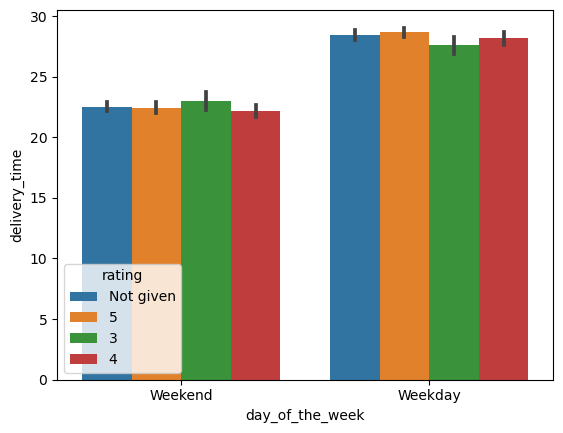

In [290]:
sns.barplot(y = 'delivery_time', x = 'day_of_the_week', data = df, hue ='rating' )

### Conclusions:
*  The delivery time during weekday is above average at 28.34 minutes. The average time is 24.16 minutes per delivery. While weekdend delivery average time is belover average time at 22.47 minutes. Food preparation average out at 27.37 minutes. Based upon the figure between rating v food prep time, food prep time does not seem to have a large influence over rating. Elements like cost of the food and delivery time seems to have more of a relationship toward ratings. 

* The company's revenue is directly correlated to the cost of the order. In the pairplot diagram, the cost of the order and revenue is represented by the value of .97, demonstrating a very strong positive relationship between the two variables. The net profit the company observe from orders is around 6166.30 dollars. This value is derived from collecting a fixed cut from orders larger than 5 dollars, and a different fixed share for orders above 20 dollars.

* The perecentage of the orders that take more than 60 minutes is 10.54%, and there are only 4 restaurants out of 178 has more than 50 ratings with 4 stars or higher. American Cuisine and Japanese cuisine makes up 55.53% of the revenue. In another word, 2 out of 14 cuisines is making up a little more than half of the business.

### Recommendations:

*  The top 3 highest cost for orders are from Mediterranean, Chineses, and Japanese cuisine. If we increase more Mediteranean and Chinese restaurants, this could be helpful for the business. As of right now, Mediterranean cuisine only makes up 2.42% of the total orders and revenue observed. It might be useful to push for higher cost items. Similar situation to Chinese restaurants. It makes up of 11.33 percent of the total orders and revenue.

* The variability from the average delivery time between weekday and weekend needs to be mentioned. During the weekday, there are more ratings, and if we potentially improve delivery time during the weekend, the total rating and business marketability could be improved as well. Citing back to ratings, elements like cost of the food and delivery time seems to have more of a relationship toward ratings. Investing in these components can help increase revenue, options, and diversity in cuisine type as well.

* Reducing food preparation time can be significant as well. Currently, there are approximately 10.54% of the total orders taking over 60 minutes to completely prepared. This can hinder delivery time, which then influence the outcome of the ratings. 4 restaurants out of 178 unique restaurants are observed to have more than 50 ratings that are 4 and up. Understanding their approaches or what makes them different can promote the overall business of the company.

---